### *Данное исследование разделим на шаги:*

- ***1. Изучение общей информации*** 

 - [Загрузка библиотек, чтение и изучение файлов с данными, ознакомление, получение общей информации](#Link1)
 
 
- ***2. Предобработка данных***

 - [Замена названий столбцов](#Link2)
 - [Проверка дубликатов](#Link3)


- ***3. Исследовательский анализ данных*** 

 - [Количественные признаки](#Link4)
   - [Изучение аномалий, выбросов, распределений признаков. Построение boxplot’ов и гистрограмм](#Link5)
   - [Изучение взаимосвязи между признаками. Построение матрицы корреляций](#Link6)
   - [Изучение взаимосвязи между количественными признаками и целевым признаком](#Link7)
 - [Категориальные признаки](#Link8)
   - [Построение столбчатых диаграмм](#Link9)


- ***4. Подготовка признаков для построения моделей*** 

 - [Применение метод прямого кодирования OHE](#Link10)
 - [Подготовка обучающей и тестовой выборок](#Link11)
 - [Масштабирование признаков](#Link12)


- ***5. Исследование баланса классов. Обучение моделей*** 

 - [Исследование баланса классов в целевом признаке датасета](#Link13)
 - [Построение моделей без учета дисбаланса классов](#Link14)
 - [Увеличение качества моделей с учетом дисбаланса классов](#Link15)
   - [Взвешивание классов](#Link16)
   - [Увеличение редкого класса в обучающей выборке](#Link17)
   - [Уменьшение частого класса в обучающей выборке](#Link18)


- ***6. Финальное тестирование. Определение лучшей модели.***

 - [Проверка моделей на тестовой выборке](#Link19)
 - [Проверка моделей на вменяемость](#Link20)
 - [Определение лучшей модели](#Link21)


- ***7. Общий вывод***

 - [Вывод](#Link22)

<a id='Link1'></a>

## 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
from time import perf_counter

from simple_colors import *

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

In [2]:
# читаем файл с данными о поведении клиентов
clients_behavior = pd.read_csv(r'Data\Churn_Modelling.csv')

print('\nИнформация о датасете Поведение клиентов: \n')
display(clients_behavior.info())

print('\nДатасет Поведение клиентов: \n')
display(clients_behavior.head(10))


Информация о датасете Поведение клиентов: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None


Датасет Поведение клиентов: 



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Вывод
- Данные соответствуют описанию
- Видим 14 колонок, 10000 строк
- `RowNumber` не несет никакой смысловой нагрузки
- Целевой признак - `Exited` (клиент ушел — 1, остался — 0)
- **Явных пропусков не наблюдается**
- Типы данных соответствуют данным, производить замену типов данных не будем
- Приведем названия столбцов к нижнему регистру
- Отметим, что клиент мог уйти (exited=1), но при этом иметь положительный баланс на счету и кредитную карту в банке

## Шаг2. Предобработка данных

<a id='Link2'></a>

 - **Приведем названия столбцов к нижему регистру**

In [3]:
# поменяем регистр на нижний в названиях столбцов
clients_behavior.columns = clients_behavior.columns.str.lower()
display(clients_behavior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

<a id='Link3'></a>

 - **Проверим и обработаем дубликаты**

In [4]:
# проверяем уникальность customerid
display('Количество уникальных id клиентов:')
display(clients_behavior.customerid.nunique())

# проверяем уникальность категориальных переменных типа object
display('Уникальные значения geography:')
display(clients_behavior.geography.value_counts())
display('Уникальные значения gender:')
display(clients_behavior.gender.value_counts())
print('Количество строк-дубликатов: ', clients_behavior.duplicated().sum())

'Количество уникальных id клиентов:'

10000

'Уникальные значения geography:'

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

'Уникальные значения gender:'

Male      5457
Female    4543
Name: gender, dtype: int64

Количество строк-дубликатов:  0


### Вывод
- Заменили регистр на нижний в названии столбцов
- Проверили данные на дубликаты, **дубликаты не обнаружены**

## 3. Исследовательский анализ данных

In [5]:
def fun_plot(plot, title, df=None,
             df_x=None, df_x_name=None, x_label=None,
             df_y=None, df_y_name=None, y_label=None,
             category=None, color=None, 
             label=None, ax=None, linestyle=None):
    
    """ функция для построения графиков

    параметры:
     - plot - типа графика, который нужно построить
     - title - заголовок
     - df - DF
     - df_x - значения для оси X
     - df_x_name - название столбца в DF для оси X
     - x_label - название оси X
     - df_y - значения для оси Y
     - df_y_name - название столбца в DF для оси Y
     - y_label - название оси Y
     - category - столбец в DF, по которому нужно сделать группировку     
     - color - цвет
     - label - название для легенды
     - ax - subplot
     - linestyle - тип линии
     """
    
    # столбчатый график
    if plot == 'bar':
        sns.barplot(x=df_x, y=df_y, hue=category, hue_order=[1, 0])

    # ящик с усами
    elif plot == 'box':
        sns.boxplot(data=df, x=category, y=df_y,
                    palette='muted', order=[1, 0])
    
    # гистограмма
    elif plot == 'hist':
        sns.histplot(data=df, x=df_x_name, hue=category,
                     kde=True, palette='muted',
                     hue_order=[1, 0], linewidth=0)
        
    # диаграмма рассеяния
    elif plot == 'scatter':
        sns.scatterplot(data=df, x=df_x_name, y=df_y_name, s=100,
                        color=color, ax=ax)
        ax.set_xticks([0,1])
    
    # тепловая диаграмма
    elif plot == 'heat':
        sns.heatmap(df, xticklabels=df.columns, yticklabels=df.columns,
                    cmap='viridis', center=0, annot=True)
    
    # линейный график
    elif plot == 'plot':
        sns.lineplot(data=pd.DataFrame({'fpr': df_x, 'tpr': df_y}),
                 x=df_x_name, y=df_y_name,
                 color=color, label=label, linestyle=linestyle)
        plt.legend(loc="lower right")
    
    # украшение графика
    plt.title(title + '\n', fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    return None

- В качестве фичей, на которых в дальнейшем будем тренировать модель для предсказания `exited`, выделим: `creditscore`, `geography`, `gender`, `age`, `tenure`, `balance`, `numofproducts`, `hascrcard`, `isactivemember`, `estimatedsalary`

In [6]:
# определим словарь количественных признаков
dict_features_numeric = {'creditscore': 'Кредитный рейтинг', 'age': 'Возраст',
                       'tenure': 'Количество объектов недвижимости', 'balance': 'Баланс на счетах клиента',
                       'numofproducts': 'Количество продуктов в банке у клиента', 'estimatedsalary': 'Зарплата'}
display('Количественные признаки: ', list(dict_features_numeric.keys()))


# определим словарь категориальных признаков
dict_features_category = {'geography': 'Страна', 'gender': 'Пол',
                          'hascrcard': 'Наличие кредитной карты',
                          'isactivemember': 'Активный пользователь услуг банка'}
display('Категориальные признаки: ', list(dict_features_category.keys()))

# определим целевой признак
target_column = 'exited'
display('Целевой признак: ', target_column)

'Количественные признаки: '

['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

'Категориальные признаки: '

['geography', 'gender', 'hascrcard', 'isactivemember']

'Целевой признак: '

'exited'

<a id='Link4'></a>

### Анализ количественных признаков:

<a id='Link5'></a>

### Изучим выбросы и аномалии. Посторим boxplot'ы и гистограммы с группировкой по целевому признаку

In [7]:
sns.set_context('paper')

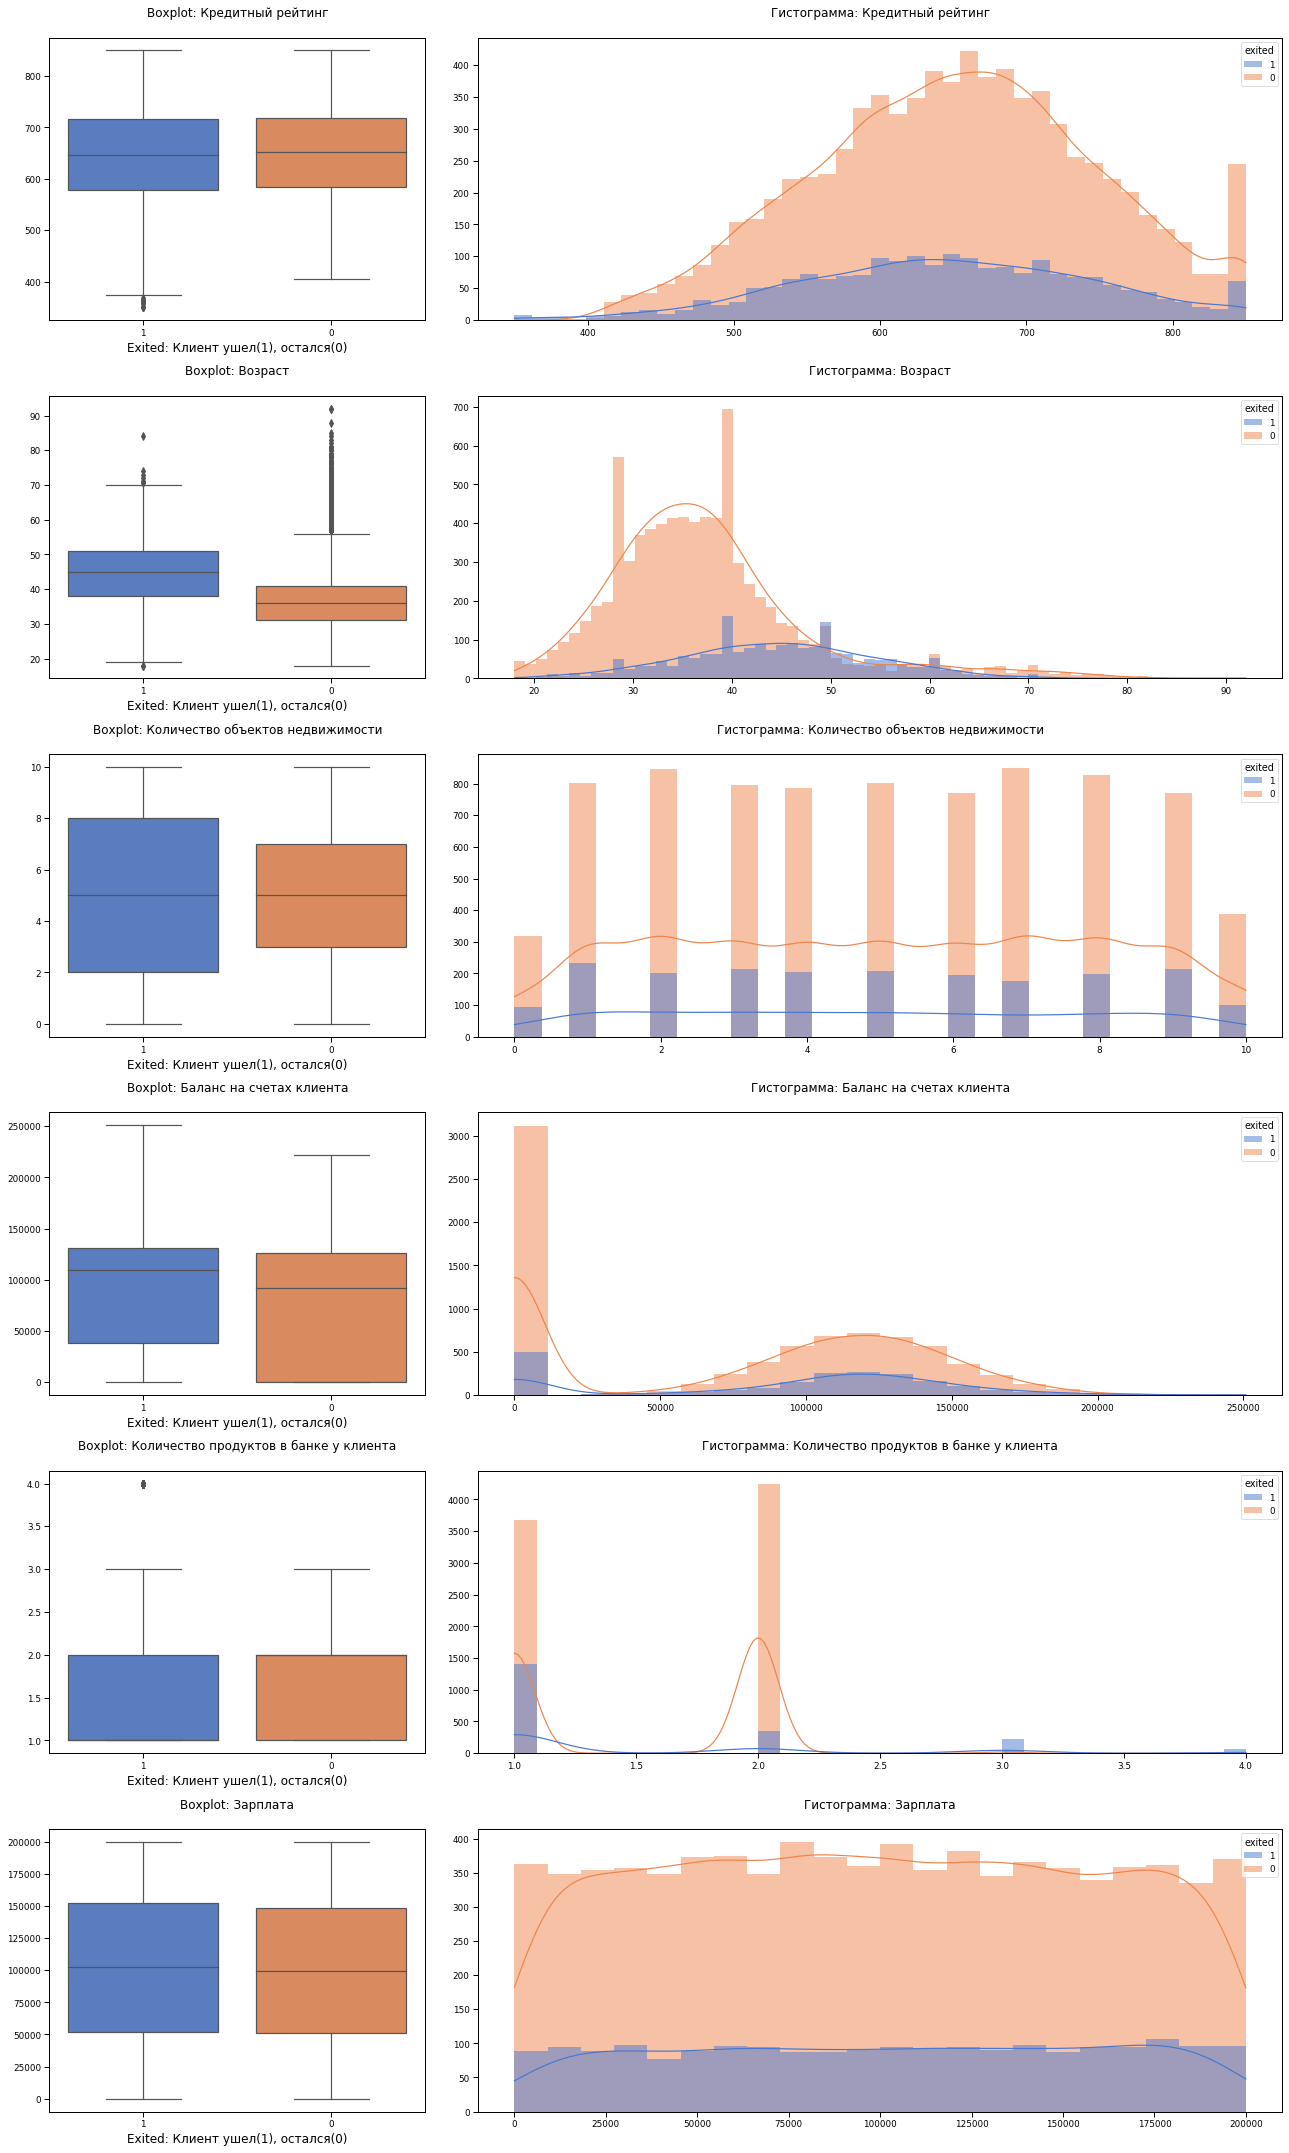

In [8]:
fig = plt.figure(figsize=(18,30))

# строим boxplot и hist по всем количественным признакам с группировкой по exited

# index строки, в которой будет отображаться текущий график
ind=0
# идем по словарю количесвтенных признаков
for feature_numeric in dict_features_numeric:
    
    # создаем subplot
    ax = plt.subplot2grid((6,3), (ind,0))
    # рисуем boxplot
    fun_plot('box', 'Boxplot: ' + dict_features_numeric[feature_numeric],
             df=clients_behavior,
             x_label='Exited: Клиент ушел(1), остался(0)',
             df_y=clients_behavior[feature_numeric],
             category=clients_behavior.exited)
       
    # создаем subplot
    ax = plt.subplot2grid((6,3), (ind,1), colspan=2)
    # рисуем hist
    fun_plot('hist', 'Гистограмма: ' + dict_features_numeric[feature_numeric],
             df=clients_behavior,
             # название столбца, по которому строим гистограмму
             df_x_name=feature_numeric,
             category=target_column)
    
    # увеличиваем индекс строки
    ind += 1
    
fig.tight_layout()

#### Вывод


- *Кредитный рейтинг `creditscore`*:
 - Видим выбросы ниже уровня 300 по тем, кто ушел. Значит, ***в том числе, уходят клиенты с очень низким рейтингом***.
 - Распределение признака похоже на нормальное, но имеет ***выраженный высокий хвост справа, похожий на второй горб***, то есть частота максимальных значений `creditscore` высока для нормального распределения. Можно сказать, что в банке относительно много клиентов с максимальным кредитным рейтингом. Возможно, для таких клиентов в банке предусмотрена специальная программа обслуживания.


- *Возраст `age`*:
 - Медианный возраст отличается:
   - клиент остался: 35 лет
   - клиент ушел: 45 лет
 - Выбросы:
   - клиент остался: выше 55 лет
   - клиент ушел: выше 70 лет.
 - ***Банк покидают более взрослые клиенты. И для тех, кто остался, возраст выше 55 лет - редкость***. *Но редкие клиенты старше 70 лет предпочитают больше оставаться, чем уходить*.
 - В распределении видим бимодальность в районах 28 и 40 лет. Опять-таки, возможно, влияние, других факторов, например, специальные программы. Например, льготная ипотека молодым семьям до 30 лет.


- *Количество объектов недвижимости `tenure`*:
 - ***Количество объектов недвижимости среди ушедших и оставшихся клиентов примерно одинаковое***.


- *Баланс на счетах клиента `balance`*:
 - Медианный баланс у тех, кто ушел, чуть выше, чем у тех, кто остался.
 - По оставшимся в банке клиентам нижняя граница усов около нуля совпадает с 1 квартилем. Это значит, что ***25% клиентов, которые остались, держат на счетах балансы около 0***. 
 - По ушедшим из банка клиентам 1 квартиль находится на уровне 50 тыс.
 - ***Те, кто остался, продолжают держать в банке очень незначительные суммы***.
 - В распределении видим ***выраженную свечу слева около нуля, похожую на второй горб (бимодальность)***. ***Наблюдаем очень высокую частоту околонулевых балансов на счетах, особенно, среди тех, кто остался***. Возможно, это связано с тем, что много клиентов (как ушедших из банка, так и оставшихся) оставляют минимальные суммы на счетах и забывают про них.


- *Количество продуктов в банке у клиента `numofproducts`*:
 - ***Среди тех, кто остался, имеют 1 или 2 продукта с банке. Те, кто ушел, чаще имели только 1 продукт***.


- *Зарплата `estimatedsalary`*:
 - ***Зарплата среди ушедших и оставшихся клиентов примерно одинаковая***.


- **Сильно выбивающихся аномальных значений нет. Выбросы оставим**.

<a id='Link6'></a>

### Изучим взаимосвязи между количественными признаками. Построим тепловую диаграмму корреляции

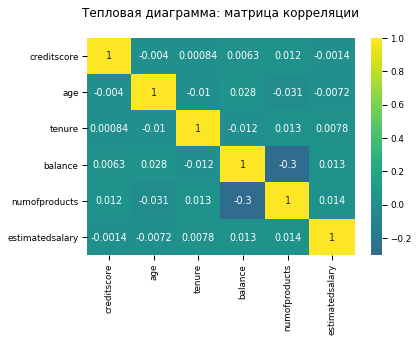

In [9]:
# строим тепловую диаграмму с корреляцией по всем количественным параметрам
fun_plot('heat', 'Тепловая диаграмма: матрица корреляции',
         df=clients_behavior[list(dict_features_numeric.keys())].corr())

#### Вывод

- Наблюдаем *слабую отрицательную корреляцию между `balance` и `numofproducts`*
- *Мультиколлинеарности* нет

<a id='Link7'></a>

### Изучим взаимосвязи между количественными признаками и целевым признаком `Exited`. Построим диаграммы рассеяния

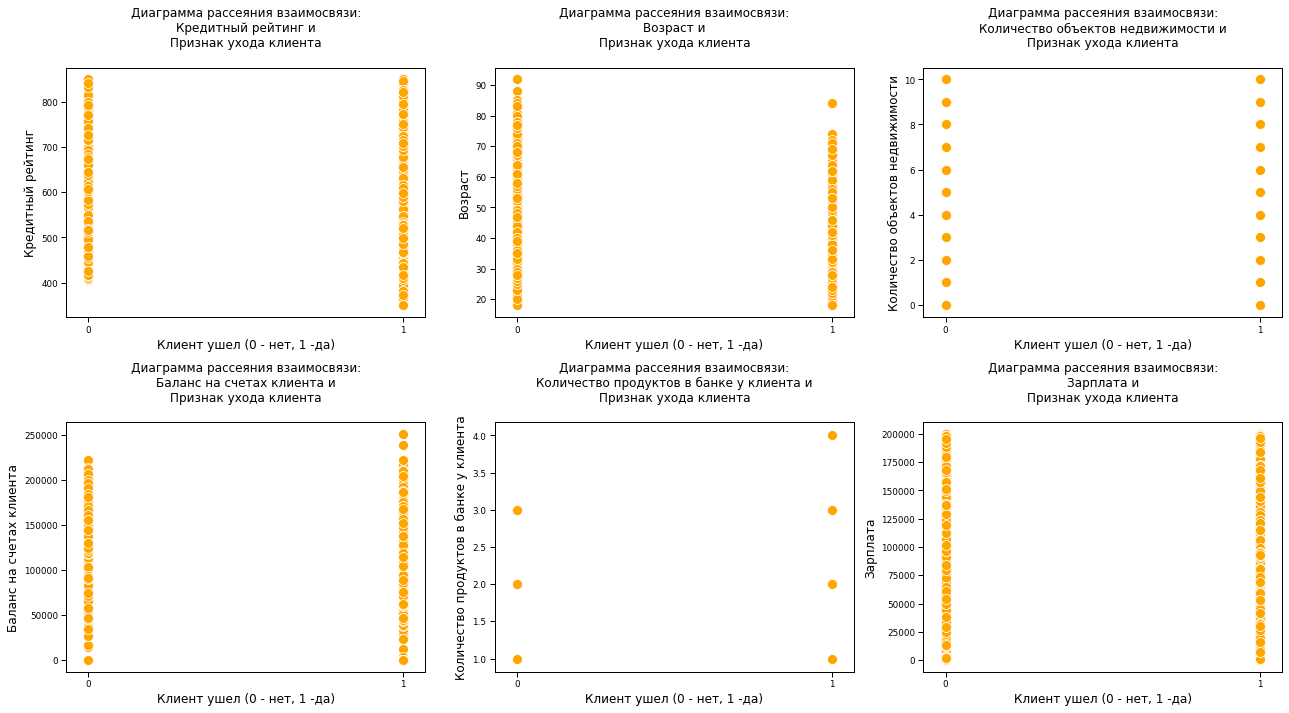

In [10]:
fig = plt.figure(figsize=(18,10))

# строим диаграммы рассеяния, чтобы посмотреть взаимосвязь между целевой переменной и фичами

# index ax для текущего графика
ind=1
for feature_count in dict_features_numeric:
    
    # создаем subplot
    ax = plt.subplot(2,3,ind)
    # рисуем scatter
    fun_plot('scatter', 'Диаграмма рассеяния взаимосвязи:\n{} и\nПризнак ухода клиента'
             .format(dict_features_numeric[feature_count]),
             x_label='Клиент ушел (0 - нет, 1 -да)',
             y_label=dict_features_numeric[feature_count],
             df=clients_behavior,
             df_x_name = target_column,
             df_y_name = str(feature_count),
             color='orange', ax=ax)
    
    # увеличиваем индекс
    ind += 1
    
fig.tight_layout()

#### Вывод
- Диаграммы рассеяния подтверждают сделанные ранее выводы, в частности:
  - Клиенты с кредитным рейтингом ниже 400 в основном уходят из банка.
  - Очень взрослые клиенты старше 70 лет предпочитают оставатся в банке.
  - Самые высокие показатели баланса на счетах (около 250 тыс) имеют клиенты, которые уходят из банка.
  - Количество объектов недвижимости и зарплата примерно одинаковые у обеих групп клиентов.

<a id='Link8'></a>

### Анализ категориальных признаков

<a id='Link9'></a>

### Изучим категориальные признаки. Построим столбчатые диаграммы с группировкой по целевому признаку

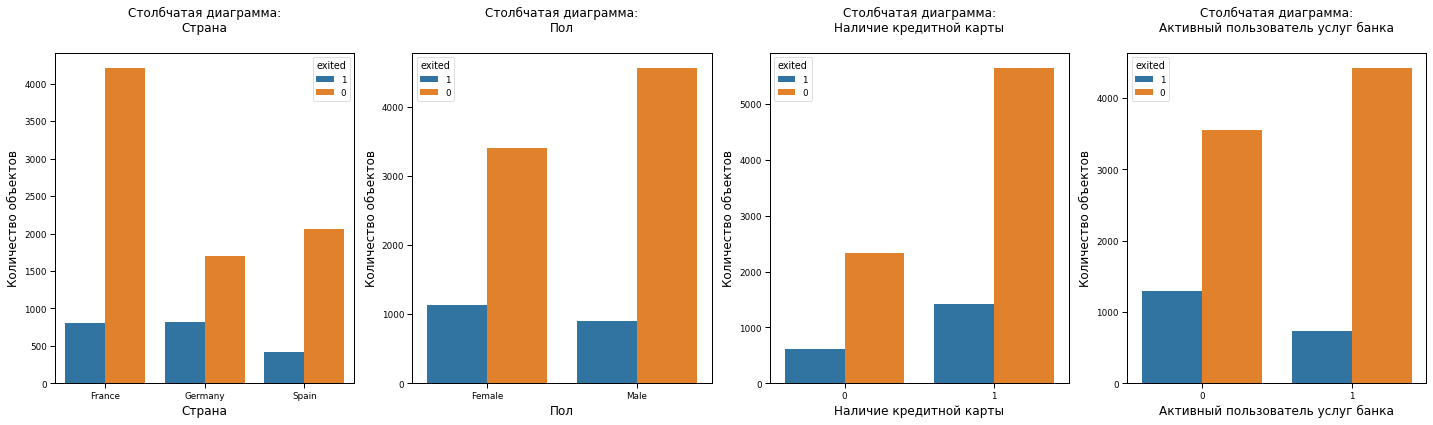

In [11]:
fig = plt.figure(figsize=(20,6))

# index ax для текущего графика
ind=1
# идем по словарю категориальных признаков
for feature_category in dict_features_category:
    
    # делаем группировку для построения столбчатых диаграмм
    df_group = clients_behavior.groupby([feature_category, target_column], as_index=False).customerid.count()

    # создаем subplot
    ax = plt.subplot(1,4,ind)
    
    # рисуем bar
    fun_plot('bar', 'Столбчатая диаграмма:\n' + dict_features_category[feature_category],
             df_x=df_group[feature_category],
             x_label=dict_features_category[feature_category],
             df_y=df_group.customerid,
             y_label='Количество объектов', category=df_group.exited)
    
    # увеличиваем индекс
    ind += 1
    
fig.tight_layout()    

#### Вывод
 - Во Франции и Испании уходит относительно немного клиентов по отношению к оставшимся; в Германии уходит почти 50% от тех, кто остается.
 - Чаще уходят мужчины.
 - Чаще уходят клиенты, имеющие кредитную карту, и неактивно пользующиеся услугами банка.
 - Графики выглядят адекватно, аномалий не наблюдаем.

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Согласен. 
</div>

## 4.  Подготовка признаков для построения модели

<a id='Link10'></a>

### Переведем категориальные признаки в числа методом прямого кодирования OHE

- В датасете уже есть категориальные признаки `hascrcard` и `isactivemember`, которые закодированы порядковым кодированием.
- Закодируем через прямое кодирование `gender` и `geography`
- Далее не берем в расчет колонки: `rownumber`, `customerid`, `surname`, так как они не могут влиять на целевой признак

In [12]:
# применяем OHE к gender и geography
clients_behavior_ohe = clients_behavior[list(dict_features_category.keys()) 
                                        + list(dict_features_numeric.keys())
                                        + [target_column]].drop(['geography', 'gender'], axis=1) \
                        .join(pd.get_dummies(clients_behavior[['geography', 'gender']],
                                             drop_first=True),
                              how='inner')

display(clients_behavior_ohe.head())

,hascrcard,isactivemember,creditscore,age,tenure,balance,numofproducts,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,1,1,619,42,2,0.00,1,101348.88,1,0,0,0
1,0,1,608,41,1,83807.86,1,112542.58,0,0,1,0
2,1,0,502,42,8,159660.80,3,113931.57,1,0,0,0
3,0,0,699,39,1,0.00,2,93826.63,0,0,0,0
4,1,1,850,43,2,125510.82,1,79084.10,0,0,1,0


<a id='Link11'></a>

### Подготовка обучающей и тестовой выборок

- Выделим *фичи* и *целевой признак*

In [13]:
# фичи исходного датасета
features = clients_behavior_ohe.drop(['exited'], axis=1)
# таргет исходного датасета
target = clients_behavior_ohe['exited']

- Разделим исходные данные на *обучающую* и *тестовую* выборки в процентном отношении: *80% / 20% от исходной выборки*

In [14]:
# делим исходный датасет: обучающая 80%, тестовая 20%

train_features, test_features, train_target, test_target = \
         train_test_split(features, target, test_size=0.20,
                          random_state=12345, stratify=target)

# выводим размеры выборок
print('Длина всего датасета: ', len(features))
print('Длина обучающей выборки:', len(train_features))
print('Длина тестовой выборки:', len(test_features))

Длина всего датасета:  10000
Длина обучающей выборки: 8000
Длина тестовой выборки: 2000


<a id='Link12'></a>

###  Масштабируем количественные признаки

In [15]:
# создаем объект структуры StandardScaler() и настраиваем его на обучающих данных
scaler = StandardScaler()
scaler.fit(train_features[list(dict_features_numeric.keys())])

# масштабируем колич признаки в обучающей выборке
train_features.loc[:, list(dict_features_numeric.keys())] = \
                scaler.transform(train_features[list(dict_features_numeric.keys())])

# масштабируем колич признаки в тестовой выборке
test_features.loc[:, list(dict_features_numeric.keys())] = \
                scaler.transform(test_features[list(dict_features_numeric.keys())])

display('Обучающая выборка после масштабирования признаков:', train_features.head())

'Обучающая выборка после масштабирования признаков:'

,hascrcard,isactivemember,creditscore,age,tenure,balance,numofproducts,estimatedsalary,geography_Germany,geography_Spain,gender_Male
3376,1,1,-0.061427,0.106098,-0.353942,0.010530,0.805878,0.267707,1,0,0
1315,0,0,-0.443298,-1.139433,-0.006983,0.388533,-0.911497,-1.612531,0,1,0
2552,1,0,-0.525865,0.680958,0.686936,0.082043,0.805878,-0.297533,0,1,0
511,1,0,-0.185277,-0.085522,0.339977,0.159218,0.805878,-0.040122,1,0,0
1888,1,1,-2.280406,2.022299,0.686936,-1.224906,0.805878,1.100176,0,0,1


### Вывод
- Перевели категориальные признаки в числа методом прямого кодирования OHE.
- Разделили исходные данные на обучающую и тестовую выборки.
- Масштабировали числовые признаки.

## 5. Исследование баланса классов. Обучение моделей. Улучшение качества моделей с учетом баланса классов.

<a id='Link13'></a>

### Исследование баланса классов в целевом признаке датасета

In [16]:
# функция для определения частоты классов
def check_class_frequency(target, title, plot_title):
    
    # частотa классов
    class_frequency = target.value_counts(normalize=True)
    display(title, class_frequency)

    # строим столбчатый график для частот классов
    fig = plt.figure(figsize=(5,4))
    ax = plt.subplot(111)
    # рисуем bar
    fun_plot('bar', plot_title,
             df_x=class_frequency.index,
             x_label='Класс целевого признака: клиент ушел (0-нет, 1-да)',
             df_y=class_frequency,
             y_label='Частота класса')
    fig.tight_layout()   
    
    return None

'Частота классов целевого признака датасета:'

0    0.7963
1    0.2037
Name: exited, dtype: float64

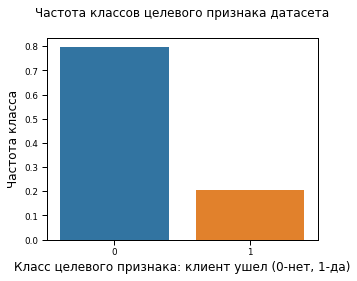

In [17]:
#проверяем частоты классов у целевого признака из дадасета
check_class_frequency(target, 'Частота классов целевого признака датасета:',
                      'Частота классов целевого признака датасета')

#### Вывод
- ***Наблюдаем дисбаланс классов целевого признака (1:4)***

#### При построении моделей будем собирать лучшие модели, у которых F1-мера >= 0.59, в датасет `best_models`

In [18]:
# создадим DF для сбора лучших моделей
best_models = pd.DataFrame(columns=['f1', 'model', 'model_name', 'params'])
# пороговое значение f1-меры для моделей
F1_MIN = 0.59

In [19]:
def fun_build_model(model, model_name, method_name, parametrs,
                    features, target, cv, params_fit, best_models):
    """функция для построения модели,
    обучает модель, подбирает лучшие параметры,
    использует кросс-валидацию и скор = score_rmse
    
    параметры:
     - структура модели
     - наименование модели
     - наименование применяемого метода для балансировки классов
     - словарь параметров, по которым нужно определить лучшую модель
     - список фичей
     - таргет
     - кол-во сплитов при кросс-валидации
     - параметры для обучения
     - DF для сбора лучших моделей
    
    возвращает результат работы метода GridSearchCV и best_models
    """
    
    # передаем модель и параметры
    # метрика = f1
    grid= GridSearchCV(model, parametrs,
                       scoring='f1',
                       n_jobs=-1, cv=cv)
    
    # обучаем модель
    grid.fit(features, target, **params_fit)

    # выводим лучшую модель, лучшие параметры и лучший скор
    print('Лучшая модель {}:'.format(model_name))
    display(grid.best_estimator_)
    print('Лучшие параметры модели:')
    display(grid.best_params_)
    print('Лучший F1: {}\n'.format(grid.best_score_.round(4)))
    # выводим время обучения полного датасета
    print('Время обучения полного обучающего датасета после получения лучших параметров: {:.3f} сек\n'
      .format(grid.refit_time_))
    
    # если лучший скор >= F1_MIN, то сохраняем модель
    if grid.best_score_ >= F1_MIN:
        best_models = best_models.append(
                    {'f1': grid.best_score_,
                     'model': grid.best_estimator_,
                     'model_name': method_name + model_name,
                     'params': grid.best_params_}, ignore_index=True)    
    
    # возвращаем grid и датасет с лучшими моделями
    return grid, best_models

<a id='Link14'></a>

### Построим модели без учета дисбаланса классов

In [20]:
def fun_build_LogisticRegression(train_features, train_target, method_name, best_models, class_weight=None):
    """
    ф-ция для построения Логистическая регрессия
    
    """
    # формируем параметры для поиска лучшей модели
    params_grid = {'C': np.arange(0.1, 10, 0.2)}

    # строим модель Логистичекая регрессия
    grid_reg, best_models = fun_build_model(LogisticRegression(random_state=12345,
                                                              class_weight=class_weight),
                                           'Логистическая регрессия',
                                            method_name,
                                            params_grid,
                                            train_features, train_target, cv=3, params_fit={},
                                            best_models=best_models)
    return best_models

In [21]:
def fun_build_DecisionTreeClassifier(train_features, train_target, method_name, best_models, class_weight=None):
    """
    ф-ция для построения Дерево решений
    
    """
    
    # формируем параметры для поиска лучшей модели
    params_grid = {'max_depth': range(1,52,2),
                   'min_samples_split': range(2,103,10),
                   'min_samples_leaf': range(1,62,5)}

    # строим модель Дерево решений
    grid_tree, best_models = fun_build_model(DecisionTreeClassifier(random_state=12345,
                                                                   class_weight=class_weight),
                                            'Дерево решений',
                                            method_name,
                                            params_grid,
                                            train_features, train_target, cv=3, params_fit={},
                                            best_models=best_models)
    return best_models    

In [22]:
def fun_build_RandomForestClassifier(train_features, train_target, method_name, best_models, class_weight=None):
    """
    ф-ция для построения Случайный лес
    
    """
    
    # формируем параметры для поиска лучшей модели
    params_grid = {'max_depth': range(1,20,2),
                   'n_estimators': range(10,101,10)}

    # строим модель Случайный лес
    grid_forest, best_models = fun_build_model(RandomForestClassifier(random_state=12345,
                                                                     class_weight=class_weight),
                                              'Случайный лес',
                                              method_name,
                                              params_grid,
                                              train_features, train_target, cv=3, params_fit={},
                                              best_models=best_models)
    return best_models    

In [23]:
# Логистическая регрессия
best_models = fun_build_LogisticRegression(train_features, train_target,
                                           'Без учета дисбаланса классов:\n', best_models)

Лучшая модель Логистическая регрессия:


LogisticRegression(C=6.700000000000001, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Лучшие параметры модели:


{'C': 6.700000000000001}

Лучший F1: 0.3222

Время обучения полного обучающего датасета после получения лучших параметров: 0.020 сек



In [24]:
# Дерево решений
best_models = fun_build_DecisionTreeClassifier(train_features, train_target,
                                               'Без учета дисбаланса классов:\n', best_models)

Лучшая модель Дерево решений:


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=102,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

Лучшие параметры модели:


{'max_depth': 11, 'min_samples_leaf': 21, 'min_samples_split': 102}

Лучший F1: 0.5899

Время обучения полного обучающего датасета после получения лучших параметров: 0.026 сек



In [25]:
# Случайный лес
best_models = fun_build_RandomForestClassifier(train_features, train_target,
                                               'Без учета дисбаланса классов:\n', best_models)

Лучшая модель Случайный лес:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Лучшие параметры модели:


{'max_depth': 19, 'n_estimators': 100}

Лучший F1: 0.5767

Время обучения полного обучающего датасета после получения лучших параметров: 1.010 сек



#### Вывод
- Значение F1-меры у всех моделей недостаточное. **Попробуем улучшить качество моделей с учетом дисбаланса классов**.

<a id='Link15'></a>

### Улучшим качество моделей с учетом дисбаланса классов

<a id='Link16'></a>

### Построим модели. Взвесим классы через аттрибут `class_weight`

- Построим модели, задав значение 'balanced' аттрибуту `class_weight`

In [26]:
# Логистическая регрессия
best_models = fun_build_LogisticRegression(train_features, train_target,
                                          'Применили метод взвешивания классов:\n', best_models,
                                           class_weight='balanced')

Лучшая модель Логистическая регрессия:


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Лучшие параметры модели:


{'C': 0.1}

Лучший F1: 0.4866

Время обучения полного обучающего датасета после получения лучших параметров: 0.019 сек



In [27]:
# Дерево решений
best_models = fun_build_DecisionTreeClassifier(train_features, train_target,
                                               'Применили метод взвешивания классов:\n', best_models,
                                               class_weight='balanced')

Лучшая модель Дерево решений:


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=31, min_samples_split=82,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

Лучшие параметры модели:


{'max_depth': 9, 'min_samples_leaf': 31, 'min_samples_split': 82}

Лучший F1: 0.5737

Время обучения полного обучающего датасета после получения лучших параметров: 0.028 сек



In [28]:
# Случайный лес
best_models = fun_build_RandomForestClassifier(train_features, train_target,
                                               'Применили метод взвешивания классов:\n', best_models,
                                               class_weight='balanced')

Лучшая модель Случайный лес:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Лучшие параметры модели:


{'max_depth': 9, 'n_estimators': 90}

Лучший F1: 0.6112

Время обучения полного обучающего датасета после получения лучших параметров: 0.638 сек



#### Вывод
- *Применили метод взвешивания классов*
- ***Самая высокая `F1-мера` 0.61 - у модели Случайный лес с глубиной дерева 9 и количеством деревьев 90***
- Получили достаточно хорошее значение F1-меры, но попробуем ещё другие методы балансировки классов

<a id='Link17'></a>

### Построим модели. Увеличим выборку у редкого класса (1) методом `upsampling`

In [29]:
# функция для увеличения выборки с редким классом
def fun_upsample(features, target, repeat):
    """
    функция для увеличения выборки с редким классом
    
    параметры:
    - признаки, таргет
    - во сколько раз увеличивать выборку с редким классом
    """
    
    print('Длина обучающей выборки до увеличения:', len(features))
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # увеличиваем выборку
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # перемешиваем
    features_upsampled = shuffle(features_upsampled, random_state=1234)
    target_upsampled = shuffle(target_upsampled, random_state=1234)
    
    print('Длина обучающей выборки с классом 1: {}. Длина обучающей выборки с классом 0: {}' \
          .format(len(features_ones), len(features_zeros)))
    print('Длина обучающей выборки после увеличения в {} раз редкого класса 1: {}' \
      .format(repeat, len(features_upsampled)))
    
    return features_upsampled, target_upsampled

In [30]:
# увеличиваем количество элементов с классом 1 в обучающей выборке
N_REPEAT = 2
train_features_upsampled, train_target_upsampled = fun_upsample(train_features, train_target, N_REPEAT)

Длина обучающей выборки до увеличения: 8000
Длина обучающей выборки с классом 1: 1630. Длина обучающей выборки с классом 0: 6370
Длина обучающей выборки после увеличения в 2 раз редкого класса 1: 9630


#### Построим модели. Для обучения передадим обучающую выборку с увеличенным редким классом 1

In [31]:
# Логистическая регрессия
best_models = fun_build_LogisticRegression(train_features_upsampled, train_target_upsampled,
                                           'Применили метод увеличения редкого класса в {} раз:\n'
                                           .format(N_REPEAT),
                                           best_models)

Лучшая модель Логистическая регрессия:


LogisticRegression(C=2.5000000000000004, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Лучшие параметры модели:


{'C': 2.5000000000000004}

Лучший F1: 0.534

Время обучения полного обучающего датасета после получения лучших параметров: 0.022 сек



In [32]:
# Дерево решений
best_models = fun_build_DecisionTreeClassifier(train_features_upsampled, train_target_upsampled,
                                           'Применили метод увеличения редкого класса в {} раз:\n'
                                           .format(N_REPEAT),
                                           best_models)

Лучшая модель Дерево решений:


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=23, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

Лучшие параметры модели:


{'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2}

Лучший F1: 0.7819

Время обучения полного обучающего датасета после получения лучших параметров: 0.042 сек



In [33]:
# Случайный лес
best_models = fun_build_RandomForestClassifier(train_features_upsampled, train_target_upsampled,
                                           'Применили метод увеличения редкого класса в {} раз:\n'
                                           .format(N_REPEAT),
                                           best_models)

Лучшая модель Случайный лес:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Лучшие параметры модели:


{'max_depth': 19, 'n_estimators': 90}

Лучший F1: 0.8604

Время обучения полного обучающего датасета после получения лучших параметров: 1.032 сек



#### Вывод
- *Применили метод увеличения редкого класса 1 в обучающей выборке*
- ***Самая высокая `F1-мера` 0.86 - у модели Случайный лес с глубиной дерева 19 и количеством деревьев 90***
- Получили достаточно хорошее значение F1-меры

<a id='Link18'></a>

### Построим модели. Уменьшим выборку у частого класса (0) методом `downsampling`

In [34]:
# функция уменьшения выборки с частым классом
def fun_downsample(features, target, fraction):
    """
    функция для уменьшения выборки с частым классом
    
    параметры:
    - признаки, таргет
    - какую долю взять от выборки с частым классом
    """
    
    print('Длина обучающей выборки до уменьшения:', len(features))    
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # получаем случайные элементы для частого класса в количестве: frac * (длина исходной выборки)
    features_downsampled = pd.concat([features_zeros.sample
                                     (frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample
                                   (frac=fraction, random_state=12345)] +
                                   [target_ones])
    
    print('Длина выборки с классом 1: {}. Длина выборки с классом 0: {}'.format(len(features_ones), len(features_zeros)))
    print('Длина обучающей выборки после уменьшения в {} раз частого класса 0: {}' \
      .format(int(1 / fraction), len(features_downsampled)))
    
    return features_downsampled, target_downsampled

In [35]:
# уменьшаем количество элементов с классом 0 в обучающей выборке
FRAC = 0.5
train_features_downsampled, train_target_downsampled = fun_downsample(train_features, train_target, FRAC)

Длина обучающей выборки до уменьшения: 8000
Длина выборки с классом 1: 1630. Длина выборки с классом 0: 6370
Длина обучающей выборки после уменьшения в 2 раз частого класса 0: 4815


### Построим модели. Для обучения передадим обучающую выборку с уменьшенным частым классом 0

In [36]:
# Логистическая регрессия
best_models = fun_build_LogisticRegression(train_features_downsampled, train_target_downsampled,
                                          'Применили метод уменьшения частого класса в {} раз:\n'.format(int(1 / FRAC)),
                                          best_models)

Лучшая модель Логистическая регрессия:


LogisticRegression(C=1.1000000000000003, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Лучшие параметры модели:


{'C': 1.1000000000000003}

Лучший F1: 0.519

Время обучения полного обучающего датасета после получения лучших параметров: 0.012 сек



In [37]:
# Дерево решений
best_models = fun_build_DecisionTreeClassifier(train_features_downsampled, train_target_downsampled,
                                              'Применили метод уменьшения частого класса в {} раз:\n'.format(int(1 / FRAC)),
                                              best_models)

Лучшая модель Дерево решений:


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=42,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

Лучшие параметры модели:


{'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 42}

Лучший F1: 0.6782

Время обучения полного обучающего датасета после получения лучших параметров: 0.014 сек



In [38]:
# Случайный лес
best_models = fun_build_RandomForestClassifier(train_features_downsampled, train_target_downsampled,
                                              'Применили метод уменьшения частого класса в {} раз:\n'.format(int(1 / FRAC)),
                                              best_models)

Лучшая модель Случайный лес:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Лучшие параметры модели:


{'max_depth': 15, 'n_estimators': 70}

Лучший F1: 0.6824

Время обучения полного обучающего датасета после получения лучших параметров: 0.458 сек



#### Вывод
- *Применили метод уменьшения частого класса 0 в обучающей выборке*
- ***Самая высокая `F1-мера` 0.68 - у модели Случайный лес с глубиной дерева 15 и количеством деревьев 70***
- Получили достаточно хорошее значение F1-меры

<a id='Link19'></a>

## 6. Проведем финальное тестирование, проверим модели на вменяемость. Определим лучшую модель.

### Выведем все наши лучшие модели с `f1` >= 0.59 при валидации, проверим их на тестовой выборке, посчитаем метрики `f1` и  `auc_roc` на тестовой выборке

In [39]:
def fun_check_by_test(best_model):
    """функция для проверки модели на тестовой выборке
    делает предсказания по переданной модели и
    рассчитывает f1, auc_roc, accuracy, fpr, tpr
    
    параметры: строка с лучшей моделью из датасета best_models
    возвращает рассчитанные метрики
    """
     
    # предсказания на тестовой выборке
    # засекаем время предсказания
    start_time = perf_counter()
    predictions = best_model.model.predict(test_features)
    stop_time = perf_counter()
    
    # вероятности получить класс 1
    probabilities_one = best_model.model.predict_proba(test_features)[:, 1]
    # метрика F1-мера
    f1 = f1_score(test_target, predictions)
    # метрика auc_roc
    auc_roc = roc_auc_score(test_target, probabilities_one)
    # метрика accuracy
    accuracy = accuracy_score(test_target, predictions)
    
    # получаем значения fpr, tpr в зависимости от thresholds
    fpr, tpr, thresholds = roc_curve(test_target, probabilities_one)
    
    # возвращаем рассчитанные метрики
    return pd.Series([f1, {'pred_time': stop_time - start_time, 'auc_roc': auc_roc,
            'accuracy': accuracy, 'fpr': fpr, 'tpr':tpr}])

 - Проверяем модели на тестовой выборке и сохраняем все метрики в датасет лучших моделей `best_models`

In [40]:
# идем по строкам датасета best_models
# проверяем все модели на тестовой выборке
# сохраняем в best_models полученные метрики
best_models[['f1_test','metrics']] = best_models.apply(fun_check_by_test, axis=1)
display(best_models)

,f1,model,model_name,params,f1_test,metrics
0,0.611192,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",Применили метод взвешивания классов:\nСлучайны...,"{'max_depth': 9, 'n_estimators': 90}",0.636872,"{'pred_time': 0.033480957999984184, 'auc_roc':..."
1,0.781895,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",Применили метод увеличения редкого класса в 2 ...,"{'max_depth': 23, 'min_samples_leaf': 1, 'min_...",0.557337,"{'pred_time': 0.0012788740000360121, 'auc_roc'..."
2,0.860404,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",Применили метод увеличения редкого класса в 2 ...,"{'max_depth': 19, 'n_estimators': 90}",0.613480,"{'pred_time': 0.042955597999991824, 'auc_roc':..."
3,0.678187,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",Применили метод уменьшения частого класса в 2 ...,"{'max_depth': 7, 'min_samples_leaf': 6, 'min_s...",0.587544,"{'pred_time': 0.001040590999991764, 'auc_roc':..."
4,0.682432,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",Применили метод уменьшения частого класса в 2 ...,"{'max_depth': 15, 'n_estimators': 70}",0.624235,"{'pred_time': 0.030754985999976725, 'auc_roc':..."


In [41]:
# функция для вывода лучших моделей
def fun_print_models(best_model):
    """
    функция для вывода лучших моделей, метрик, графика ROC-curve
    
    параметры: строка с лучшей моделью из датасета best_models
    """
    
    # выводим место модели в рейтинге
    print(red('{} место'.format(best_model['index']+1), 'bold'))
    
    # выводим лучшие параметры модели и метрики
    print(blue(best_model.model_name, 'bold'))
    print('Лучшие параметры:\n', best_model.params)
    print('F1 при валидации во время обучения: {:.2f}'.format(best_model.f1))
    # метрики на тестовой выборке
    print(red('\nF1 на тестовой выборке: {:.2f}'.format(best_model.f1_test)))
    print (blue('Время предсказания: {:.6f} s'.format(best_model.metrics['pred_time'])))
    print('AUC_ROC на тестовой выборке: {:.2f}'.format(best_model.metrics['auc_roc']))
    print('ACCURACY на тестовой выборке: {:.2f}\n'.format(best_model.metrics['accuracy']))
 
    #рисуем график roc_curve
    fig = plt.figure(figsize=(5,3))
    ax = plt.subplot(111)

    # roc_curve
    fun_plot('plot', 'ROC-кривая:\n',
             df_x=best_model.metrics['fpr'], df_x_name='fpr',
             x_label='False Positive Rate',
             df_y=best_model.metrics['tpr'], df_y_name='tpr',
             y_label='True Positive Rate = Recall',
             label='ROC curve (area = %0.2f)' % best_model.metrics['auc_roc'],
             color='darkorange')
    
    # линия treshhold
    fun_plot('plot', 'ROC-кривая:\n',
             df_x=[0, 1], df_x_name='fpr',
             x_label='False Positive Rate',
             df_y=[0, 1], df_y_name='tpr',
             y_label='True Positive Rate = Recall',
             color='navy', linestyle='dotted')
    
    fig.tight_layout()
    plt.show()
    
    print(blue('\n------------------------------------------------\n'))

 - Отсортируем наши лучшие модели по `f1` на тестовой выборке по убыванию и выведем лучшие модели


Наши лучшие модели:

------------------------------------------------

1 место
Применили метод взвешивания классов:
Случайный лес
Лучшие параметры:
 {'max_depth': 9, 'n_estimators': 90}
F1 при валидации во время обучения: 0.61

F1 на тестовой выборке: 0.64
Время предсказания: 0.033481 s
AUC_ROC на тестовой выборке: 0.87
ACCURACY на тестовой выборке: 0.84



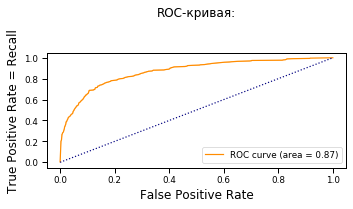


------------------------------------------------

2 место
Применили метод уменьшения частого класса в 2 раз:
Случайный лес
Лучшие параметры:
 {'max_depth': 15, 'n_estimators': 70}
F1 при валидации во время обучения: 0.68

F1 на тестовой выборке: 0.62
Время предсказания: 0.030755 s
AUC_ROC на тестовой выборке: 0.86
ACCURACY на тестовой выборке: 0.85



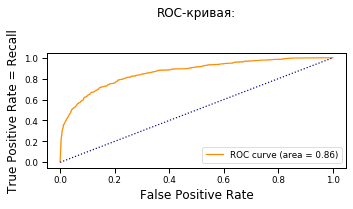


------------------------------------------------

3 место
Применили метод увеличения редкого класса в 2 раз:
Случайный лес
Лучшие параметры:
 {'max_depth': 19, 'n_estimators': 90}
F1 при валидации во время обучения: 0.86

F1 на тестовой выборке: 0.61
Время предсказания: 0.042956 s
AUC_ROC на тестовой выборке: 0.86
ACCURACY на тестовой выборке: 0.86



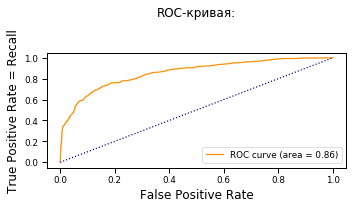


------------------------------------------------

4 место
Применили метод уменьшения частого класса в 2 раз:
Дерево решений
Лучшие параметры:
 {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 42}
F1 при валидации во время обучения: 0.68

F1 на тестовой выборке: 0.59
Время предсказания: 0.001041 s
AUC_ROC на тестовой выборке: 0.85
ACCURACY на тестовой выборке: 0.82



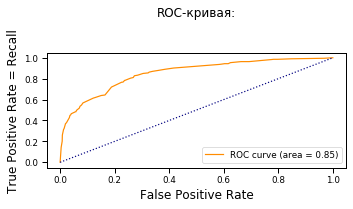


------------------------------------------------

5 место
Применили метод увеличения редкого класса в 2 раз:
Дерево решений
Лучшие параметры:
 {'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 при валидации во время обучения: 0.78

F1 на тестовой выборке: 0.56
Время предсказания: 0.001279 s
AUC_ROC на тестовой выборке: 0.72
ACCURACY на тестовой выборке: 0.82



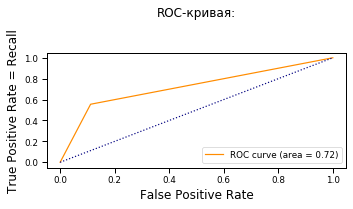


------------------------------------------------



0    None
1    None
2    None
3    None
4    None
dtype: object

In [42]:
# сортируем best_models по f1 на тестовой выборке
# составялем рейтинг моделей
best_models = best_models.sort_values('f1_test', ascending=False)
best_models = best_models.reset_index(drop=True).reset_index()

print('\nНаши лучшие модели:\n')
print(blue('------------------------------------------------\n'))

# идем по строкам датасета best_models
# выводим все наши модели, начиная с самой лучшей
best_models.apply(fun_print_models, axis=1)

<a id='Link20'></a>

### Проверим модели на вменяемость

 - Посчитаем `f1` для константной модели, прогнозирующей класс 1

In [43]:
# f1 для константной модели
print('F1 константной модели на тестовой выборке: {:.3f}'.
      format(f1_score(test_target, np.ones(len(test_target)))))

F1 константной модели на тестовой выборке: 0.338


 - Посчитаем `accuracy` константной модели, прогнозирующей самый частый класс 0

In [44]:
# accuracy для константной модели
print('Accuracy константной модели на тестовой выборке: {:.3f}'.
      format(accuracy_score(test_target, np.zeros(len(test_target)))))

Accuracy константной модели на тестовой выборке: 0.796


 - **Все наши лучшие модели прошли проверку на вменяемость**

<a id='Link21'></a>

### Определим лучшую модель
 - Проверили модели на тестовой выборке.
 - Проверили модели на вменяемость. Все модели прошли проверку.
 - **Самая лучшая модель: Случайный лес с параметрами {'max_depth': 9, 'n_estimators': 90} при методе взвешивания классов:**
    - *F1 на тестовой выборке: 0.64*
    - Время предсказания: 0.03 s
    - *AUC_ROC на тестовой выборке: 0.87*
    - ACCURACY на тестовой выборке: 0.84

 - Отметим, что Дерево решений на тестовой выборке показало себя не лучшим образом

<a id='Link22'></a>

## 7. Общий вывод

1. **Изучили файл с поведением клиентов банка**
  - Явных *пропусков не обнаружили*
  - Определили *Целевой признак - Exited* (клиент ушел — 1, остался — 0)


2. **Предобработали данные**
  - Заменили названия столбцов - привели к нижнему регистру
  - *Дубликаты не обнаружили*


3. **Провели исследовательский анализ данных. Проверили выбросы, распределения признаков**
  - **Количественные признаки:**
    - Сильно выбивающихся аномальных значений не обнаружили. *Найденные выбросы оставили*. Отметили:
      - Среди ушедших клиентов есть клиенты с низким кредитным рейтингом (ниже 300). При этом **в банке относительно много клиентов с максимальным кредитным рейтингом. Возможно, для таких клиентов в банке предусмотрена специальная программа обслуживания**.
      - Медианный возраст тех, кто ушел = 45 лет, это на 10 лет больше, чем у тех, кто остался. ***Банк покидают более взрослые клиенты. И для тех, кто остался, возраст выше 55 лет - редкость***. *Но редкие клиенты старше 70 лет предпочитают больше оставаться, чем уходить*.
      - ***Количество объектов недвижимости среди ушедших и оставшихся клиентов примерно одинаковое***.
      - ***Наблюдаем очень высокую частоту околонулевых балансов на счетах, особенно, среди тех, кто остался***. Возможно, это связано с тем, что много клиентов (как ушедших из банка, так и оставшихся) оставляют минимальные суммы на счетах и забывают про них.
      - ***Среди тех, кто остался, имеют 1 или 2 продукта с банке. Те, кто ушел, чаще имели только 1 продукт***.
      - ***Зарплата среди ушедших и оставшихся клиентов примерно одинаковая***.
    - Проверили взаимосвязи между признаками. Нашли слабую отрицательную корреляцию между `balance` и `numofproducts`. *Мультиколлинеарность не обнаружили*.
  - **Категориальные признаки:**
    - Во Франции и Испании уходит относительно немного клиентов по отношению к оставшимся; в Германии уходит почти 50% от тех, кто остается.
    - Чаще уходят мужчины.
    - Чаще уходят клиенты, имеющие кредитную карту, и неактивно пользующиеся услугами банка.
  
  
4. **Подготовили признаки для построения моделей** 
 - Применили метод прямого кодирования OHE к признакам `gender` и `geography`
 - Подготовили обучающую и тестовую выборки
 - Масштабировали числовые признаки 


5. **Исследовали баланс классов. Построили модели**
 - Обнаружили *дисбаланс классов*:
    - 0: 0.7963
    - 1: 0.2037
  - Построили модели (Дерево решений, Случайный лес, Логистическая регрессия) *без учета дисбаланса классов*. Уровень `F1-меры` оказался недостаточным.
  - Улучшили качество моделей:
    - *Применили метод взвешивания классов*
    - *Применили метод увеличения редкого класса 1 в обучающей выборке*
    - *Применили метод уменьшения частого класса 0 в обучающей выборке*
  - *Получили 5 лучших моделей по значению F1-меры на обучающей выборке*


6. **Провели финальное тестирование на тестовой выборке, проверили на вменяемость, определили лучшую модель**
 - Проверили модели на тестовой выборке. Отметили, что Дерево решений на тестовой выборке показало себя не лучшим образом
 - Проверили модели на вменяемость. Все модели прошли проверку.
 
 - **Самая лучшая модель: Случайный лес с параметрами {'max_depth': 9, 'n_estimators': 90} при методе взвешивания классов:**
    - ***F1 на тестовой выборке: 0.64***
    - Время предсказания: 0.03 s
    - ***AUC_ROC на тестовой выборке: 0.87***
    - ***ACCURACY на тестовой выборке: 0.84***
 - Именно эту модель **рекомендуем использовать для прогнозирования оттока клиентов** банка: уйдёт клиент из банка в ближайшее время или нет.